In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf 
import os, shutil

In [2]:
original_dataset_dir = "/OneDrive/Desktop/chest_X-ray"

In [3]:
base_dir =  "Normal_and_Pneumonia"


In [7]:
# Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')


validation_dir = os.path.join(base_dir, 'validation')


test_dir = os.path.join(base_dir, 'test')


In [10]:
# Directory with training  pictures


train_Normal_dir = os.path.join(train_dir, 'Normal')
train_Pneumonia_dir = os.path.join(train_dir, 'Pneumonia')
validation_Normal_dir = os.path.join(validation_dir, 'Normal')
validation_Pneumonia_dir = os.path.join(validation_dir, 'Pneumonia')
test_Normal_dir = os.path.join(test_dir, 'Normal')
test_Pneumonia_dir = os.path.join(test_dir, 'Pneumonia')

In [4]:
# import model and layres
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 150, 150, 512)     2048      
_________________________________________________________________
flatten_3 (Flatten)          (None, 11520000)          0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11520001  
Total params: 11,522,049
Trainable params: 11,522,049
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compile
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [11]:
# Data Processing
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


validation_generator = test_datagen.flow_from_directory(
        validation_dir,
         target_size=(150, 150),
         batch_size=20,
         class_mode='binary')

Found 5216 images belonging to 3 classes.
Found 1000 images belonging to 2 classes.


In [12]:
# Fit model 
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 236s 2s/step - loss: 2.5463 - acc: 0.7125 - val_loss: 0.3074 - val_acc: 0.8850
Epoch 2/100
100/100 [==============================] - 205s 2s/step - loss: 1.0690 - acc: 0.8070 - val_loss: 0.3731 - val_acc: 0.8670
Epoch 3/100
100/100 [==============================] - 191s 2s/step - loss: 0.5640 - acc: 0.8677 - val_loss: 0.1873 - val_acc: 0.9370
Epoch 4/100
100/100 [==============================] - 200s 2s/step - loss: 0.3769 - acc: 0.8958 - val_loss: 0.3774 - val_acc: 0.8500
Epoch 5/100
100/100 [==============================] - 191s 2s/step - loss: 0.2781 - acc: 0.9190 - val_loss: 0.1707 - val_acc: 0.9330
Epoch 6/100
100/100 [==============================] - 192s 2s/step - loss: 0.2248 - acc: 0.9259 - val_loss: 0.2459 - val_acc: 0.8910
Epoch 7/100
100/100 [==============================] - 192s 2s/step - loss: 0.1992 - acc: 0.9290 - val_loss: 0.5057 - va

Epoch 60/100
100/100 [==============================] - 193s 2s/step - loss: 0.0242 - acc: 0.9915 - val_loss: 0.0408 - val_acc: 0.9850
Epoch 61/100
100/100 [==============================] - 193s 2s/step - loss: 0.0163 - acc: 0.9960 - val_loss: 0.0340 - val_acc: 0.9900
Epoch 62/100
100/100 [==============================] - 193s 2s/step - loss: 0.0227 - acc: 0.9925 - val_loss: 0.0179 - val_acc: 0.9950
Epoch 63/100
100/100 [==============================] - 194s 2s/step - loss: 0.0237 - acc: 0.9915 - val_loss: 0.0273 - val_acc: 0.9900
Epoch 64/100
100/100 [==============================] - 194s 2s/step - loss: 0.0193 - acc: 0.9950 - val_loss: 0.0162 - val_acc: 0.9940
Epoch 65/100
100/100 [==============================] - 199s 2s/step - loss: 0.0191 - acc: 0.9950 - val_loss: 0.0151 - val_acc: 0.9950
Epoch 66/100
100/100 [==============================] - 225s 2s/step - loss: 0.0223 - acc: 0.9945 - val_loss: 0.0402 - val_acc: 0.9880
Epoch 67/100
100/100 [==============================] -

In [13]:
# Saving the model

model.save('Pneumonia_Detection_using_ann.h5')

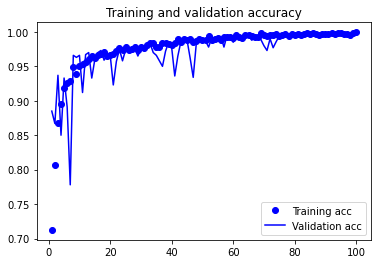

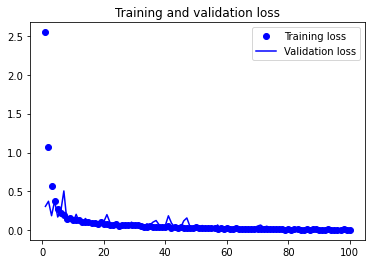

In [14]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()